## EPITA International Programs Department<br>Academic Year: 2020-2021<br>AI in signal and audio processing course

# <center> <br><br>PRACTICAL WORK: SESSION 3<br>HIDDEN MARKOV MODELS<br></center>

## I. Example of HMM implementation

A [hidden Markov model](https://en.wikipedia.org/wiki/Hidden_Markov_model) (HMM) is a statistical Markov model in which the system being modeled is assumed to be a [Markov process](https://en.wikipedia.org/wiki/Markov_chain) with unobserved (i.e. hidden) states.

Hidden Markov models are especially known for their application in reinforcement learning and temporal pattern recognition such as speech, handwriting, gesture recognition, part-of-speech tagging, musical score following, partial discharges and bioinformatics.

A discrete HMM is formally defined with a number of elements, which are the following: <br> <br>

<table border="10" style="margin-top:0px; margin-left:20px; font-size:105%"  > 
    <tr>
        <td><p align="left">$𝑆={𝑆_0,𝑆_1,…,𝑆_𝑁 }$</td>        	
        <td><p align="left">set of possible states</td> 
    </tr>
    <tr>
        <td><p align="left">$V={𝑉_0, 𝑉_1, …, 𝑉_𝑀 }$</td> 	
        <td><p align="left">set of possible observations</td> 
    </tr>
    <tr>
        <td><p align="left">$𝑄=(𝑞_0, 𝑞_1, …, 𝑞_𝑇 )$</td>        	
        <td><p align="left">sequence of states with 𝑡 from 0 to 𝑇</td> 
    </tr>
    <tr>
        <td><p align="left">$𝒪 =(ℴ_0,ℴ_1, …,ℴ_𝑇 )$</td>        	
        <td><p align="left">sequence of observations with 𝑡 from 0 to 𝑇</td> 
    </tr>
    <tr>
        <td><p align="left">$𝑎_(𝑖,𝑗)=𝑃(𝑞_(𝑡+1)=𝑆_𝑗│𝑞_𝑡=𝑆_𝑖 )$</td>        	
        <td><p align="left">state transition probability (matrix 𝐴)</td> 
    </tr>
    <tr>
        <td><p align="left">$𝑏_𝑗 (𝑘)=𝑃(ℴ_𝑡=𝑉_𝑘│𝑞_𝑡=𝑆_𝑗 )$</td>        	
        <td><p align="left">observation probability (matrix 𝐵)</td> 
    </tr>
    <tr>
        <td><p align="left">$𝜋={𝜋_0,𝜋_2,…, 𝜋_𝑁 }$</td>        	
        <td><p align="left">initial state distribution, with $𝜋_𝑖=𝑃(𝑞_0=𝑆_𝑖 )$</td> 
    </tr>
</table>

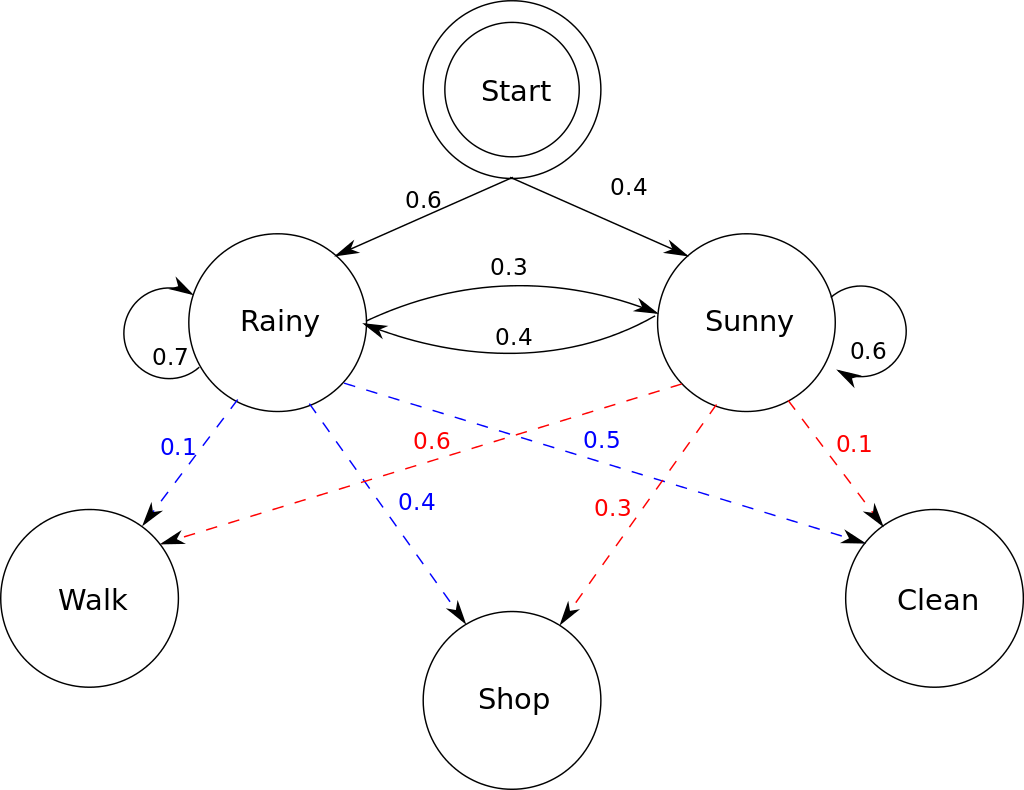

In [4]:
from IPython.display import Image
Image("HMMGraph.png")

Model the example that is presented just above.

In [5]:
states = ('Rainy', 'Sunny')
 
observations = ('walk', 'shop', 'clean')
 
start_probability = {'Rainy': 0.6, 'Sunny': 0.4}
 
transition_probability = {
   'Rainy' : {'Rainy': 0.7 , 'Sunny': 0.3},
   'Sunny' : {'Rainy': 0.4, 'Sunny': 0.6},
   }
 
emission_probability = {
   'Rainy' : {'walk':0.1 , 'shop':0.4 , 'clean': 0.5},
   'Sunny' : {'walk':0.6, 'shop':0.3, 'clean':0.1 },
   }

In [8]:
! pip install hmmlearn


  Using cached hmmlearn-0.2.7-cp39-cp39-macosx_11_0_arm64.whl


In [15]:
import numpy as np
import scipy
from hmmlearn import hmm

##from sklearn import preprocessing
##encoder = preprocessing.LabelEncoder()

startprob    = [start_probability[s] for s in states]
transmat     = [[transition_probability[s1][s2] for s2 in states] for s1 in states]
emissionprob = [[emission_probability[s][o] for o in observations] for s in states]

state_map       = {'decode':{idx:s for idx,s in enumerate(states)},
                   'encode':{s:idx for idx,s in enumerate(states)}}
observation_map = {'decode':{idx:obs for idx,obs in enumerate(observations)},
                   'encode':{obs:idx for idx,obs in enumerate(observations)}}

print(emissionprob)
print(state_map)

[[0.1, 0.4, 0.5], [0.6, 0.3, 0.1]]
{'decode': {0: 'Rainy', 1: 'Sunny'}, 'encode': {'Rainy': 0, 'Sunny': 1}}


In [21]:
states= ('di', 'le' )
    
observations=('sig_frame_1', 'sig_frame_2','sig_frame_3' )

start_probability = {'di': 0.6, 'le': 0.4}

transition_probability = {
   'di' : {'le': 0.6 , 'di': 0.4},
   'le' : {'di': 0.7, 'le': 0.3},
   }

transmat =[[0.6,0.4],[0.7,0.3]]
emissionprob = [[0.3, 0.4, 0.3],[0.2,0.4,0.4]]
Observed_sequence=['sig_frame_2', 'sig_frame_1','sig_frame_2']

state_map       = {'decode':{idx:s for idx,s in enumerate(states)},
                   'encode':{s:idx for idx,s in enumerate(states)}}
observation_map = {'decode':{idx:obs for idx,obs in enumerate(observations)},
                   'encode':{obs:idx for idx,obs in enumerate(observations)}}

print(emissionprob)
print(state_map)

[[0.3, 0.4, 0.3], [0.2, 0.4, 0.4]]
{'decode': {0: 'di', 1: 'le'}, 'encode': {'di': 0, 'le': 1}}


Use MultinomialHMM to model the problem.

In [22]:
from hmmlearn import hmm

model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = startprob
model.transmat_ = transmat
model.emissionprob_ = emissionprob
model._check()

In [23]:
means  = model.get_stationary_distribution()
print('means = ' + str(means))

means = [0.63636364 0.36363636]


Find the most probable sequence of states

In [ ]:
observed_sequence = ['walk', 'walk', 'walk', 'shop', 'walk', 'walk', 'walk', 'walk', 'clean']

obs_seq = [[observation_map['encode'][o]] for o in observed_sequence]
print(obs_seq)

logprob,state_seq = model.decode(obs_seq)
print(state_seq)

predicted_state_sequence = [state_map['decode'][s] for s in state_seq]
print(predicted_state_sequence)

In [24]:
observed_sequence = Observed_sequence
obs_seq = [[observation_map['encode'][o]] for o in observed_sequence]
print(obs_seq)

logprob,state_seq = model.decode(obs_seq)
print(state_seq)

predicted_state_sequence = [state_map['decode'][s] for s in state_seq]
print(predicted_state_sequence)

[[1], [0], [1]]
[0 0 0]
['di', 'di', 'di']


Predict the most probable observation that we may see.

In [55]:
state_sequence = ['Rainy', 'Sunny', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Sunny', 'Sunny']
state_seq = [[state_map['encode'][s]] for s in state_sequence]
print(state_seq)

obs_seq = model.predict(state_seq)
print(obs_seq)

predicted_observed_sequence = [observation_map['decode'][o] for o in obs_seq]
print(predicted_observed_sequence)

[[0], [1], [0], [1], [0], [1], [1], [1], [1]]
[1 1 1 1 1 0 0 0 0]
['shop', 'shop', 'shop', 'shop', 'shop', 'walk', 'walk', 'walk', 'walk']


Find the model that would best match the sequence observations and states.

[[0, 0], [1, 0], [0, 0], [1, 1], [0, 0], [1, 0], [1, 0], [1, 0], [1, 2]]
[0.5299802 0.4700198]
[[0.34088356 0.59980522 0.05931122]
 [0.77526691 0.17302136 0.05171173]]


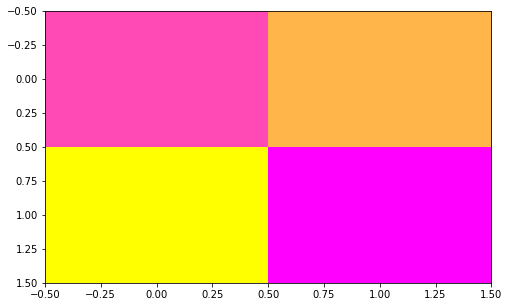

In [102]:
state_sequence    = ['Rainy', 'Sunny', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Sunny', 'Sunny']
observed_sequence = ['walk', 'walk', 'walk', 'shop', 'walk', 'walk', 'walk', 'walk', 'clean']

T = min(len(state_sequence),len(observed_sequence))

state_obs_seq = [[state_map['encode'][state_sequence[t]],
                  observation_map['encode'][observed_sequence[t]]] for t in range(T)]
print(state_obs_seq)
predicted_model = hmm.MultinomialHMM(n_components=2)
predicted_model.fit(state_obs_seq)
predicted_model._check()
print(predicted_model.get_stationary_distribution())
print(predicted_model.emissionprob_ )
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.imshow(predicted_model.transmat_, aspect='auto', cmap='spring')

## II. Application to speech recognition

Hidden Markov Models (HMMs) are powerful, flexible methods for representing and classifying data with trends over time, and have been a key component in speech recognition systems for many years.

I found it very difficult to find a good example (with code) of a simple speech recognition system, so I decided to create this post. Though this implementation won't win any awards for "Best Speech Recognizer", I hope it will provide some insight into how HMMs can be used for speech recognition and other tasks.

In this post, I will define what Hidden Markov Models are, show how to implement one form (Gaussian Mixture Model HMM, GMM-HMM) using numpy + scipy, and how to use this algorithm for single speaker speech recognition. For a more "production grade" HMM implementation, see hmmlearn which holds the HMM implementations that were formerly a part of sklearn.

### Data

To demonstrate this algorithm, we need a dataset to operate on. I have chosen to use the sample dataset from this Google Code project by Hakon Sandsmark. I also used this code as a reference when creating my own implementation of a Guassian Mixture Model HMM (GMM-HMM). This aided in testing my implementation, as well as giving a frame of reference for performance.

Other available datasets are largely multispeaker, but the simple frequency peak features used in this example do not work in the multispeaker regime (different speakers have different frequency content for the same word! Let alone male/female speech differences). Future work will cover more advanced feature extraction techniques for audio, and extend these examples to multispeaker recognition.

In [62]:
import os
import IPython.display as ipd
import numpy as np

fpaths = []
labels = []
spoken = []
for f in os.listdir('audio'):
    for w in os.listdir('audio/' + f):
        fpaths.append('audio/' + f + '/' + w)
        labels.append(f)
        if f not in spoken:
            spoken.append(f)
print('Words spoken:', spoken)

Words spoken: ['apple', 'kiwi', 'lime', 'banana', 'pineapple', 'orange', 'peach']


This data has a total of 7 different spoken words, and each was spoken 15 different times, giving a grand total of 105 files. Next, the files will be extracted into a single data matrix (zero padding files to uniform length), and a label vector with the correct label for each data file is created.

In [75]:
#Files can be heard in Linux using the following commands from the command line
#cat kiwi07.wav | aplay -f S16_LE -t wav -r 8000
#Files are signed 16 bit raw, sample rate 8000
from scipy.io import wavfile

data = np.zeros((len(fpaths), 32000))
maxsize = -1
for n,file in enumerate(fpaths):
    _, d = wavfile.read(file)
    data[n, :d.shape[0]] = d
    if d.shape[0] > maxsize:
        maxsize = d.shape[0]
data = data[:, :maxsize]

#Each sample file is one row in data, and has one entry in labels
print('Number of files total:', data.shape[0])
all_labels = np.zeros(data.shape[0])
for n, l in enumerate(set(labels)):
    all_labels[np.array([i for i, _ in enumerate(labels) if _ == l])] = n
    
print('Labels and label indices', all_labels)

Number of files total: 105
Labels and label indices [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3.]


Once the data has been downloaded and turned into an input matrix, the next step is to extract features from the raw data, as is done in many other machine learning pipelines.

Most "consumer grade" speaker recognition systems use advanced processing to extract a variety of features that describe the sound over both frequency and time, and until recently "custom features" were one of the keys to making a great recognition system. The current state of the art has even moved to using deep neural networks for feature extraction.

But in this example, simple frequency peak detection was used, rather than the bevy of expert features typically used in a modern speech recognition pipeline (MFCCs, or a pretrained multilayer neural network). This has of course a direct effect onto performance.

In [92]:
import scipy

def stft(x, fftsize=64, overlap_pct=.5):   
    #Modified from http://stackoverflow.com/questions/2459295/stft-and-istft-in-python
    hop = int(fftsize * (1 - overlap_pct))
    w = scipy.hanning(fftsize + 1)[:-1]    
    raw = np.array([np.fft.rfft(w * x[i:i + fftsize]) for i in range(0, len(x) - fftsize, hop)])
    return raw[:, :(fftsize // 2)]


In order to find peaks in frequency, a technique called the Short Time Fourier Transform (STFT) is used. This idea is quite simple - the FFT is applied over chunks of the input data, resulting in a 2D FFT "image", usually called the spectrogram. Setting the FFT size allows us to control the amount of frequency resolution available, while overlapping these windows allows us to control the time resolution at the cost of increasing the data size.

Briefly, if X is a vector of length 20, we wish to create a 2D array, STFT_X. If the FFT size is 10, and the overlap is .5 (5 samples), this means (in pseudocode):

STFT_X[0, :] = FFT(X[0:9])

STFT_X[1, :] = FFT(X[5:14])

STFT_X[2, :] = FFT(X[10:19])
We then have 3 FFT frames which have been extracted from the input sample X. For our feature extraction, we would next find peaks in each row of STFT_X.

The STFT is usually a crucial element of most DSP pipelines, and highly efficient routines are available to compute this (see FFTW, which numpy wraps). Though I have implemented my own STFT here, it is also possible to use matplotlib's specgram function instead.

(216, 32)


/var/folders/kq/4phtjsxn40794zp8lvjfsccw0000gn/T/ipykernel_57909/3698945622.py:6: DeprecationWarning: scipy.hanning is deprecated and will be removed in SciPy 2.0.0, use numpy.hanning instead
  w = scipy.hanning(fftsize + 1)[:-1]


Text(0.5, 1.0, 'PSD of apple example')

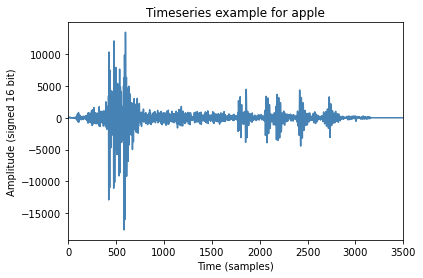

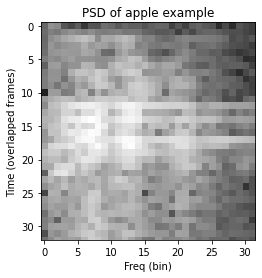

In [93]:
import matplotlib.pyplot as plt
plt.plot(data[0, :], color='steelblue')
plt.title('Timeseries example for %s'%labels[0])
plt.xlim(0, 3500)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (signed 16 bit)')
plt.figure()

# + 1 to avoid log of 0
log_freq = 20 * np.log(np.
                       
                       abs(stft(data[0, :])) + 1)
print(log_freq.shape)
plt.imshow(log_freq, cmap='gray', interpolation=None)
plt.xlabel('Freq (bin)')
plt.ylabel('Time (overlapped frames)')
plt.ylim(log_freq.shape[1])
plt.title('PSD of %s example'%labels[0])

Next, peak detection is applied to each FFT frame of every data file. In a previous blog post, I described the use of wavelets for peak detection. Here, we will use a moving window to search for peaks instead. The primary steps to this algorithm are as follows:

Create a data window of length X. In this example X=9, though any window size can be used.
Split this window into 3 sections: left, center and right. For the 9 sample window, this will be LLLCCCRRR.
Apply some function (mean, median, max, min, etc) over each section of the window.
If the maximum value of the function over the center section is greater than the result for left or right, continue to the next check. Otherwise GOTO 6.
If the maximum value for f(CCC) is in the very center of the window, you have found a peak! Mark it and continue. Otherwise, go to the next step.
Shift the input data by one sample, and repeat the process. (data[0:9] -> data[1:10])
Once all data has been processed, you should have some detected peaks. Sort them in descending order by amplitude, then output the top N peaks. In this case, N=6
An implementation of this algorithm is shown below.

In [94]:
import IPython.display as ipd
import
import numpy 

SyntaxError: invalid syntax (995981471.py, line 2)

/var/folders/kq/4phtjsxn40794zp8lvjfsccw0000gn/T/ipykernel_57909/3527294813.py:8: DeprecationWarning: scipy.hanning is deprecated and will be removed in SciPy 2.0.0, use numpy.hanning instead
  w = scipy.hanning(fftsize + 1)[:-1]


Processed obs 0
Processed obs 10
Processed obs 20
Processed obs 30
Processed obs 40
Processed obs 50
Processed obs 60
Processed obs 70
Processed obs 80
Processed obs 90
Processed obs 100
(105, 6, 216)
(216, 32)


Text(0, 0.5, 'Amplitude')

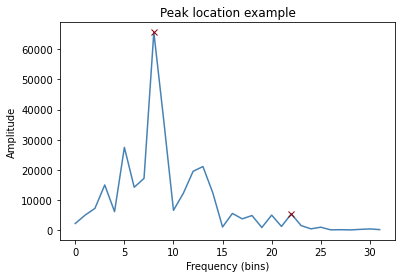

In [95]:
#######################
# feature engineering #
#######################   

def stft(x, fftsize=64, overlap_pct=.5):   
    #Modified from http://stackoverflow.com/questions/2459295/stft-and-istft-in-python
    hop = int(fftsize * (1 - overlap_pct))
    w = scipy.hanning(fftsize + 1)[:-1]    
    raw = np.array([np.fft.rfft(w * x[i:i + fftsize]) for i in range(0, len(x) - fftsize, hop)])
    return raw[:, :(fftsize // 2)]

#Peak detection using the technique described here: http://kkjkok.blogspot.com/2013/12/dsp-snippets_9.html 
def peakfind(x, n_peaks, l_size=3, r_size=3, c_size=3, f=np.mean):
    win_size = l_size + r_size + c_size
    shape = x.shape[:-1] + (x.shape[-1] - win_size + 1, win_size)
    strides = x.strides + (x.strides[-1],)
    xs = np.lib.stride_tricks.as_strided(x, shape=shape, strides=strides)
    def is_peak(x):
        centered = (np.argmax(x) == l_size + int(c_size/2))
        l = x[:l_size]
        c = x[l_size:l_size + c_size]
        r = x[-r_size:]
        passes = np.max(c) > np.max([f(l), f(r)])
        if centered and passes:
            return np.max(c)
        else:
            return -1
    r = np.apply_along_axis(is_peak, 1, xs)
    top = np.argsort(r, None)[::-1]
    heights = r[top[:n_peaks]]
    #Add l_size and half - 1 of center size to get to actual peak location
    top[top > -1] = top[top > -1] + l_size + int(c_size / 2.)
    return heights, top[:n_peaks]

all_obs = []
for i in range(data.shape[0]):
    d = np.abs(stft(data[i, :]))
    n_dim = 6
    obs = np.zeros((n_dim, d.shape[0]))
    for r in range(d.shape[0]):
        _, t = peakfind(d[r, :], n_peaks=n_dim)
        obs[:, r] = t.copy()
    if i % 10 == 0:
        print("Processed obs %s" % i)
    all_obs.append(obs)
    
all_obs = np.atleast_3d(all_obs)
print(all_obs.shape)
print(d.shape)

#######################
## plot new features ##
#######################

plot_data = np.abs(stft(data[0, :]))[15, :]
values, locs = peakfind(plot_data, n_peaks=6)
fp = locs[values > -1]
fv = values[values > -1]
plt.plot(plot_data, color='steelblue')
plt.plot(fp, fv, 'x', color='darkred')
plt.title('Peak location example')
plt.xlabel('Frequency (bins)')
plt.ylabel('Amplitude')

In [81]:
import scipy.stats as st
import numpy as np

class gmmhmm:
    #This class converted with modifications from https://code.google.com/p/hmm-speech-recognition/source/browse/Word.m
    def __init__(self, n_states):
        self.n_states = n_states
        self.random_state = np.random.RandomState(0)
        
        #Normalize random initial state
        self.prior = self._normalize(self.random_state.rand(self.n_states, 1))
        self.A = self._stochasticize(self.random_state.rand(self.n_states, self.n_states))
        
        self.mu = None
        self.covs = None
        self.n_dims = None
           
    def _forward(self, B):
        log_likelihood = 0.
        T = B.shape[1]
        alpha = np.zeros(B.shape)
        for t in range(T):
            if t == 0:
                alpha[:, t] = B[:, t] * self.prior.ravel()
            else:
                alpha[:, t] = B[:, t] * np.dot(self.A.T, alpha[:, t - 1])
         
            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood = log_likelihood + np.log(alpha_sum)
        return log_likelihood, alpha
    
    def _backward(self, B):
        T = B.shape[1]
        beta = np.zeros(B.shape);
           
        beta[:, -1] = np.ones(B.shape[0])
            
        for t in range(T - 1)[::-1]:
            beta[:, t] = np.dot(self.A, (B[:, t + 1] * beta[:, t + 1]))
            beta[:, t] /= np.sum(beta[:, t])
        return beta
    
    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.n_states, obs.shape[1]))
        for s in range(self.n_states):
            #Needs scipy 0.14
            np.random.seed(self.random_state.randint(1))
            B[s, :] = st.multivariate_normal.pdf(
                obs.T, mean=self.mu[:, s].T, cov=self.covs[:, :, s].T)
            #This function can (and will!) return values >> 1
            #See the discussion here for the equivalent matlab function
            #https://groups.google.com/forum/#!topic/comp.soft-sys.matlab/YksWK0T74Ak
            #Key line: "Probabilities have to be less than 1,
            #Densities can be anything, even infinite (at individual points)."
            #This is evaluating the density at individual points...
        return B
    
    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)
    
    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)
    
    def _em_init(self, obs):
        #Using this _em_init function allows for less required constructor args
        if self.n_dims is None:
            self.n_dims = obs.shape[0]
        if self.mu is None:
            subset = self.random_state.choice(np.arange(self.n_dims), size=self.n_states, replace=False)
            self.mu = obs[:, subset]
        if self.covs is None:
            self.covs = np.zeros((self.n_dims, self.n_dims, self.n_states))
            self.covs += np.diag(np.diag(np.cov(obs)))[:, :, None]
        return self
    
    def _em_step(self, obs): 
        obs = np.atleast_2d(obs)
        B = self._state_likelihood(obs)
        T = obs.shape[1]
        
        log_likelihood, alpha = self._forward(B)
        beta = self._backward(B)
        
        xi_sum = np.zeros((self.n_states, self.n_states))
        gamma = np.zeros((self.n_states, T))
        
        for t in range(T - 1):
            partial_sum = self.A * np.dot(alpha[:, t], (beta[:, t] * B[:, t + 1]).T)
            xi_sum += self._normalize(partial_sum)
            partial_g = alpha[:, t] * beta[:, t]
            gamma[:, t] = self._normalize(partial_g)
              
        partial_g = alpha[:, -1] * beta[:, -1]
        gamma[:, -1] = self._normalize(partial_g)
        
        expected_prior = gamma[:, 0]
        expected_A = self._stochasticize(xi_sum)
        
        expected_mu = np.zeros((self.n_dims, self.n_states))
        expected_covs = np.zeros((self.n_dims, self.n_dims, self.n_states))
        
        gamma_state_sum = np.sum(gamma, axis=1)
        #Set zeros to 1 before dividing
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)
        
        for s in range(self.n_states):
            gamma_obs = obs * gamma[s, :]
            expected_mu[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]
            partial_covs = np.dot(gamma_obs, obs.T) / gamma_state_sum[s] - np.dot(expected_mu[:, s], expected_mu[:, s].T)
            #Symmetrize
            partial_covs = np.triu(partial_covs) + np.triu(partial_covs).T - np.diag(partial_covs)
        
        #Ensure positive semidefinite by adding diagonal loading
        expected_covs += .01 * np.eye(self.n_dims)[:, :, None]
        
        self.prior = expected_prior
        self.mu = expected_mu
        self.covs = expected_covs
        self.A = expected_A
        return log_likelihood
    
    def fit(self, obs, n_iter=15):
        #Support for 2D and 3D arrays
        #2D should be n_features, n_dims
        #3D should be n_examples, n_features, n_dims
        #For example, with 6 features per speech segment, 105 different words
        #this array should be size
        #(105, 6, X) where X is the number of frames with features extracted
        #For a single example file, the array should be size (6, X)
        if len(obs.shape) == 2:
            for i in range(n_iter):
                self._em_init(obs)
                log_likelihood = self._em_step(obs)
        elif len(obs.shape) == 3:
            count = obs.shape[0]
            for n in range(count):
                for i in range(n_iter):
                    self._em_init(obs[n, :, :])
                    log_likelihood = self._em_step(obs[n, :, :])
        return self
    
    def transform(self, obs):
        #Support for 2D and 3D arrays
        #2D should be n_features, n_dims
        #3D should be n_examples, n_features, n_dims
        #For example, with 6 features per speech segment, 105 different words
        #this array should be size
        #(105, 6, X) where X is the number of frames with features extracted
        #For a single example file, the array should be size (6, X)
        if len(obs.shape) == 2:
            B = self._state_likelihood(obs)
            log_likelihood, _ = self._forward(B)
            return log_likelihood
        elif len(obs.shape) == 3:
            count = obs.shape[0]
            out = np.zeros((count,))
            for n in range(count):
                B = self._state_likelihood(obs[n, :, :])
                log_likelihood, _ = self._forward(B)
                out[n] = log_likelihood
            return out

if __name__ == "__main__":
    rstate = np.random.RandomState(0)
    t1 = np.ones((4, 40)) + .001 * rstate.rand(4, 40)
    t1 /= t1.sum(axis=0)
    t2 = rstate.rand(*t1.shape)
    t2 /= t2.sum(axis=0)
    
    m1 = gmmhmm(2)
    m1.fit(t1)
    m2 = gmmhmm(2)
    m2.fit(t2)
    
    m1t1 = m1.transform(t1)
    m2t1 = m2.transform(t1)
    print("Likelihoods for test set 1")
    print("M1:", m1t1)
    print("M2:", m2t1)
    print("Prediction for test set 1")
    print("Model", np.argmax([m1t1, m2t1]) + 1)
    print()
    
    m1t2 = m1.transform(t2)
    m2t2 = m2.transform(t2)
    print("Likelihoods for test set 2")
    print("M1:", m1t2)
    print("M2:", m2t2)
    print("Prediction for test set 2")
    print("Model", np.argmax([m1t2, m2t2]) + 1)

Likelihoods for test set 1
M1: 221.38828575112734
M2: 165.27280230776492
Prediction for test set 1
Model 1

Likelihoods for test set 2
M1: 33.194594214851946
M2: 59.15274753052998
Prediction for test set 2
Model 2


In [96]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(test_size=0.1, random_state=0)

for n,i in enumerate(all_obs):
    all_obs[n] /= all_obs[n].sum(axis=0)

for train_index, test_index in sss.split(all_obs,all_labels):
    X_train, X_test = all_obs[train_index, ...], all_obs[test_index, ...]
    y_train, y_test = all_labels[train_index], all_labels[test_index]
print('Size of training matrix:', X_train.shape)
print('Size of testing matrix:', X_test.shape)



Size of training matrix: (94, 6, 216)
Size of testing matrix: (11, 6, 216)


In [97]:
ys = set(all_labels)
ms = [gmmhmm(6) for y in ys]
_ = [m.fit(X_train[y_train == y, :, :]) for m, y in zip(ms, ys)]
ps = [m.transform(X_test) for m in ms]
res = np.vstack(ps)
predicted_labels = np.argmax(res, axis=0)
missed = (predicted_labels != y_test)
print('Test accuracy: %.2f percent' % (100 * (1 - np.mean(missed))))

Test accuracy: 72.73 percent


/var/folders/kq/4phtjsxn40794zp8lvjfsccw0000gn/T/ipykernel_57909/2880339331.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels([" "] + [l[:2] for l in spoken])
/var/folders/kq/4phtjsxn40794zp8lvjfsccw0000gn/T/ipykernel_57909/2880339331.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_yticklabels([" "] + spoken)


Text(0.5, 0, 'Predicted label')

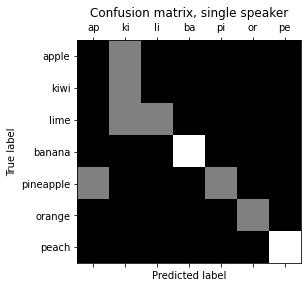

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_labels)
plt.matshow(cm, cmap='gray')
ax = plt.gca()
_ = ax.set_xticklabels([" "] + [l[:2] for l in spoken])
_ = ax.set_yticklabels([" "] + spoken)
plt.title('Confusion matrix, single speaker')
plt.ylabel('True label')
plt.xlabel('Predicted label')